# Importing Libraries
These are some of the libraries which will be required for the EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

# Now lets start by reading the Data

In [2]:
train_path = '/kaggle/input/titanic/train.csv'
test_path = '/kaggle/input/titanic/test.csv'
# Read the csv file into train_data dataframe
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [3]:
# Check first five rows of train.csv
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check the number of rows and columns in the train data
df_train.shape

(891, 12)

In [5]:
# To get the overview of the train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# To get summary of numerical columns in train data
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# To get the summary of categorical columns in train data
df_train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**From the initial observation in the TRAIN data we can tell the following :**
* The train dataset contains 891 rows and 12 columns
* Out of those 12 columns there are 7 numericals and 5 categorical colummns
* From categorical column 'Sex' we can conclude that there are more males in the train dataset
* From categorical column 'Embarked' we can conclude that most of the people embarked from Southampton(S)

In [8]:
# Check first five rows of test.csv
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
# Check the number of rows and columns in the test data
df_test.shape

(418, 11)

In [10]:
# To get the overview of the test data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
# To get the summary of the numerical columns in test data
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
# To get the summary of categorical columns in test data
df_test.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


**Similarly from the initial observation in the TEST data we can tell the following :**
* The train dataset contains 418 rows and 11 columns
* Out of those 11 columns there are 6 numericals and 5 categorical colummns
* From categorical column 'Sex' we can conclude that there are more males in the train dataset
* From categorical column 'Embarked' we can conclude that most of the people embarked from Southampton(S)

# Checking for inconsistent values

In [13]:
# To check the number of unique values in each column in train dataset
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [14]:
# To See all the unique values in following columns in train dataset
for col in ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    print(f'The unique values in column {col} are : {df_train[col].unique()}')

The unique values in column Survived are : [0 1]
The unique values in column Pclass are : [3 1 2]
The unique values in column Sex are : ['male' 'female']
The unique values in column SibSp are : [1 0 3 4 2 5 8]
The unique values in column Parch are : [0 1 2 5 3 4 6]
The unique values in column Embarked are : ['S' 'C' 'Q' nan]


In [15]:
# To check the value counts for each value in following columns in train dataset
for col in ['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin']:
    print(f'{df_train[col].value_counts()}\n\n')

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64


Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64


Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64


Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2

**Unique values in the above columns in TRAIN dataset are just as expected and are not inconsistent**

In [16]:
# To check the number of unique values in each column in test dataset
df_test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [17]:
# To See all the unique values in following columns in test dataset
for col in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    print(f'The unique values in column {col} are : {df_test[col].unique()}')

The unique values in column Pclass are : [3 2 1]
The unique values in column Sex are : ['male' 'female']
The unique values in column SibSp are : [0 1 2 3 4 5 8]
The unique values in column Parch are : [0 1 3 2 4 6 5 9]
The unique values in column Embarked are : ['Q' 'S' 'C']


In [18]:
# To check the value counts for each value in following columns in test dataset
for col in ['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin']:
    print(f'{df_test[col].value_counts()}\n\n')

PassengerId
892     1
1205    1
1177    1
1176    1
1175    1
       ..
1028    1
1027    1
1026    1
1025    1
1309    1
Name: count, Length: 418, dtype: int64


Name
Kelly, Mr. James               1
Carr, Miss. Jeannie            1
Dennis, Mr. William            1
Rosblom, Miss. Salli Helena    1
Touma, Miss. Maria Youssef     1
                              ..
Zakarian, Mr. Mapriededer      1
Carlsson, Mr. Carl Robert      1
Dintcheff, Mr. Valtcho         1
Thomas, Mr. Charles P          1
Peter, Master. Michael J       1
Name: count, Length: 418, dtype: int64


Age
21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: count, Length: 79, dtype: int64


Ticket
PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: count, Length: 363, dtype: int64


Fare
7.7500     21
26.0000    19
13.0000    17
8.0500     17


**Similarly unique values in the above columns in TEST dataset are just as expected and are not inconsistent**

# Missing values
**We will now check for missing values in both TRAIN and TEST datasets and how to handle them**

<Axes: >

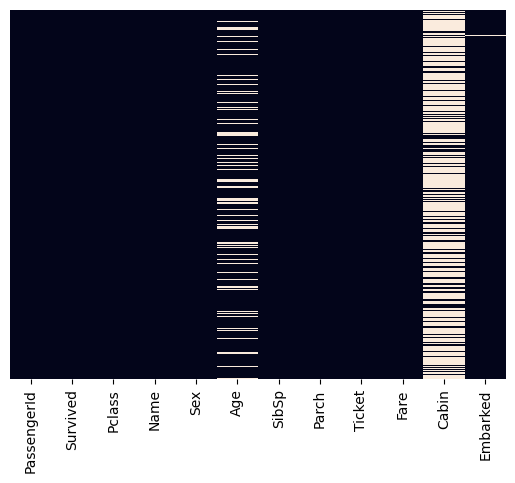

In [19]:
# Heatmap for missing values in train dataset
sns.heatmap(df_train.isna(), yticklabels = False, cbar = False)

As we can see from the HEATMAP above that there are missing values in column - Age, Cabin, Embarked

Lets dive deeper into it and learn more about the missing values in the train dataset

In [20]:
# To check the number of missing values in each columns in train dataset
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
# To check the percentage of missing values in each columns in train dataset
df_train.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

* Age column has 177 missing values which is about 19.8% of total values
* Cabin column has 687 missing values which is about 77.1% of total values
* Embarked column has 2 missing values which is about 0.22% of total values

<Axes: >

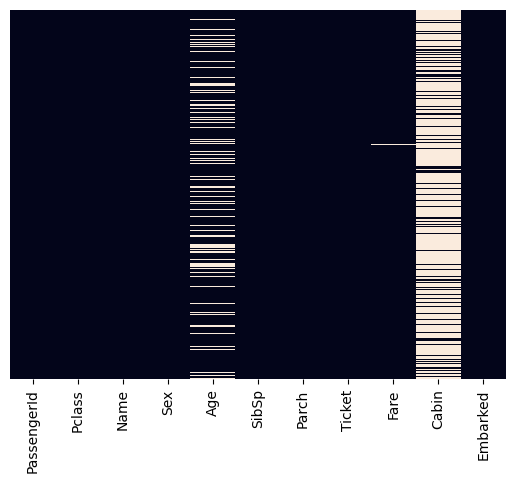

In [22]:
# Heatmap for missing values in test dataset
sns.heatmap(df_test.isna(), yticklabels = False, cbar = False)

As we can see from the HEATMAP above that there are missing values in column - Age, Cabin, Fare

Lets dive deeper into it and learn more about the missing values in the test dataset

In [23]:
# To check the number of missing values in each columns in test dataset
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [24]:
# To check the number of missing values in each columns in test dataset
df_test.isna().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

* Age column has 86 missing values which is about 20.57% of total values
* Cabin column has 327 missing values which is about 78.22% of total values
* Fare column has 1 missing values which is about 0.23% of total values

# Handling the missing values
**First we will deal with the TRAIN dataset**

<Axes: xlabel='Age', ylabel='Count'>

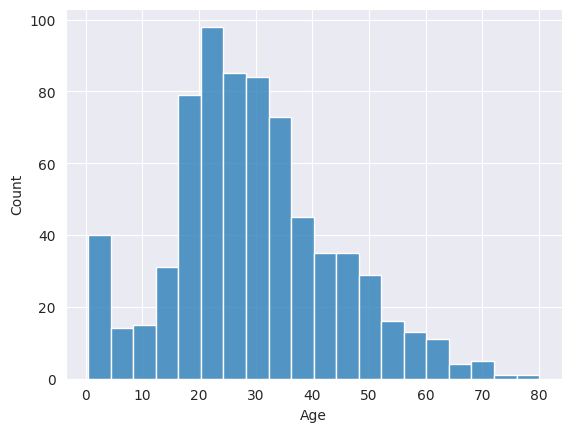

In [25]:
# To see the age distribution in train dataset using histogram
sns.set_style('darkgrid')
sns.histplot(data = df_train, x = 'Age')

The distribution looks normal and is not skewed

<Axes: xlabel='Pclass', ylabel='Age'>

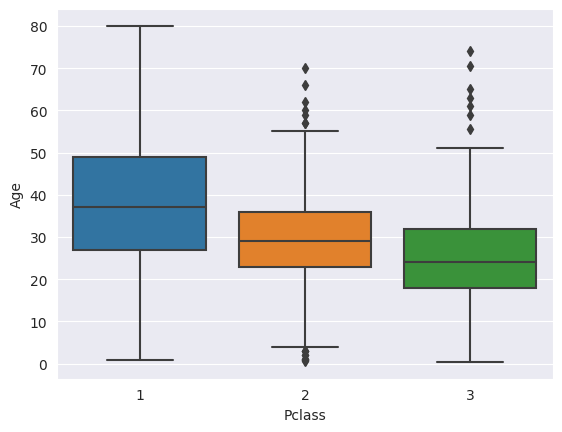

In [26]:
# To see boxplot of age with respect to Passenger class
sns.boxplot(data= df_train, x = 'Pclass', y = 'Age')

* From the plot above we can easily see that overall age of Pclass-1 is graeter that Pclass-2 which in turn is greater than Pclass-3
* As their are outliers in the plot above, therfore we will use median to handle the missing values for their respect passenger class

In [27]:
# To check the median age for every class in Pclass
df_train.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [28]:
# function for imputing age in missing values with respect to their Pclass
def imputeAge(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [29]:
# Using the above function to impute age in missing value for respective Pclass
df_train['Age'] = df_train[['Age', 'Pclass']].apply(imputeAge, axis = 1)

We have successfully handled the missing values in the Age column in TRAIN data set, now lets do the rest of coulmns with missing values

<Axes: xlabel='Embarked', ylabel='count'>

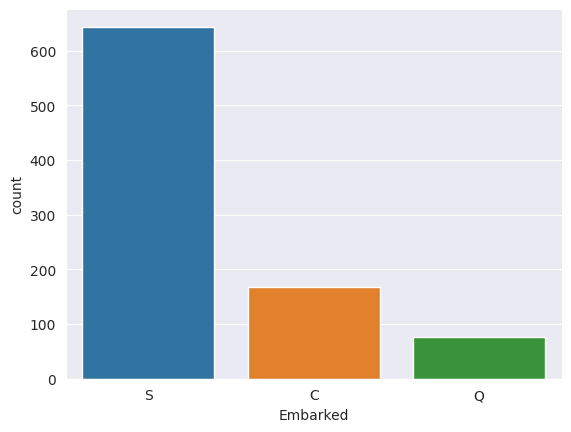

In [30]:
# To check the countplot for the Embarked column in train dataset
sns.countplot(data = df_train, x = 'Embarked')

As we can clearly see that majority of the people Embarked from Southampton('S'), we can use it to handle the missing values in Embarked column

In [31]:
# To fill the missing values in Embarked column
df_train['Embarked'] = df_train['Embarked'].fillna('S')

Now we are only left with Cabin column, but know that about ~80% of the values are missing in the Cabin column.
As most of values are missing in the Cabin column, therefore it is better the drop the column as it will not be of much use anyways.

In [32]:
# To drop the cabin column from the train dataset
df_train.drop(columns = 'Cabin', inplace = True)

<Axes: >

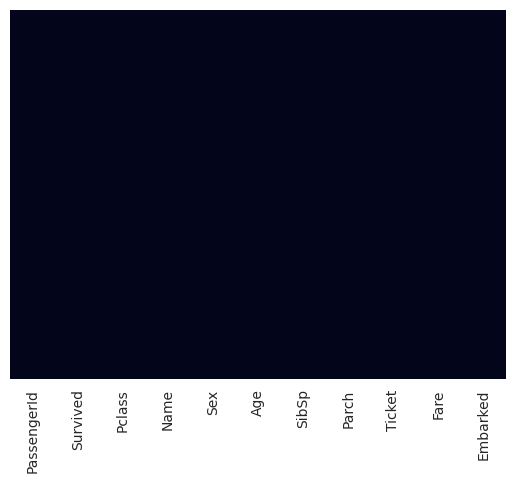

In [33]:
# To check for missing values using heatmap
sns.heatmap(df_train.isna(), yticklabels = False, cbar = False)

**From the above heatmap we can see that there are no missing values left in TRAIN dataset, now lets handle the missing values in TEST dataset**

<Axes: xlabel='Age', ylabel='Count'>

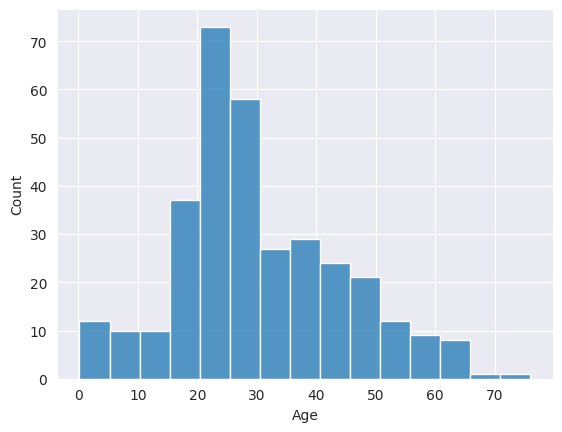

In [34]:
# To see the age distribution in test dataset using histogram
sns.histplot(data = df_test, x = 'Age')

<Axes: xlabel='Pclass', ylabel='Age'>

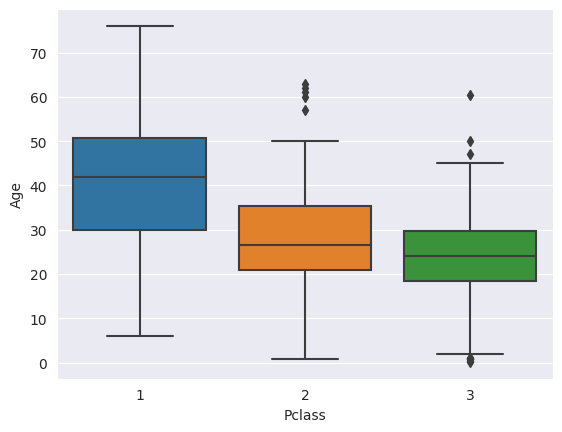

In [35]:
# To see boxplot of age with respect to Passenger class
sns.boxplot(data= df_test, x = 'Pclass', y = 'Age')

* Our observation is again very similar to TRAIN dataset, as such we will use median to impute missing values 

In [36]:
# To check the median age for every class in Pclass
df_test.groupby('Pclass')['Age'].median()

Pclass
1    42.0
2    26.5
3    24.0
Name: Age, dtype: float64

In [37]:
# function for imputing age in missing values with respect to their Pclass
def imputeAgeTest(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 27
        else:
            return 24
    else:
        return Age

In [38]:
# Using the above function to impute age in missing value for respective Pclass
df_test['Age'] = df_test[['Age', 'Pclass']].apply(imputeAgeTest, axis = 1)

Now we done with Age column in TEST dataset, lets look at Fare columns next.

<Axes: xlabel='Fare', ylabel='Count'>

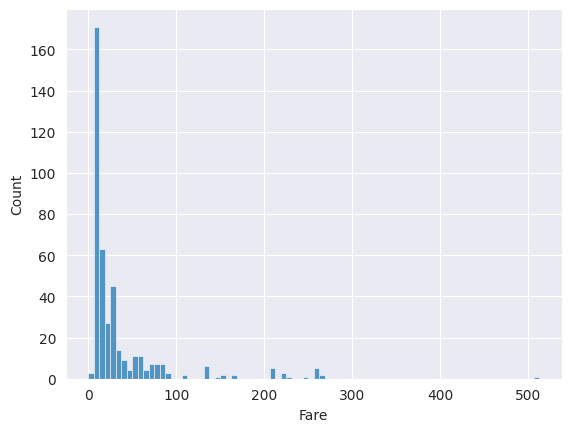

In [39]:
# To see the histogram of Fare in test dataset
sns.histplot(data= df_test, x = 'Fare')

* We can clearly tell by watching the histogram above that data is highly skewed, therefore we will use median to replace the missing value

In [40]:
# To fill the missing value in Fare column with median in test dataset
df_test['Fare'].fillna(df_test['Fare'].median(), inplace = True)

* Similar to TRAIN dataset, majority of the Cabin column is also missing in TEST dataset.
* Therefore we will drop Cabin column here as well

In [41]:
#  To drop the cabin column in test dataset 
df_test.drop(columns = 'Cabin', inplace = True)

<Axes: >

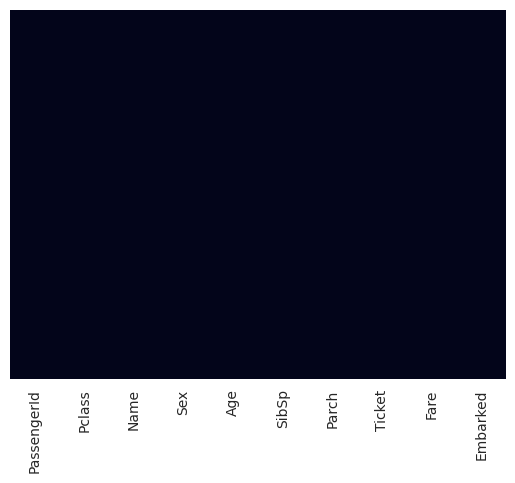

In [42]:
# To check for missing values using heatmap
sns.heatmap(df_test.isna(), yticklabels = False, cbar = False)

**As we can see that we are done with handling the missing values in TEST dataset as well**

# Exploratory Data Analysis(EDA)

<Axes: xlabel='Survived', ylabel='count'>

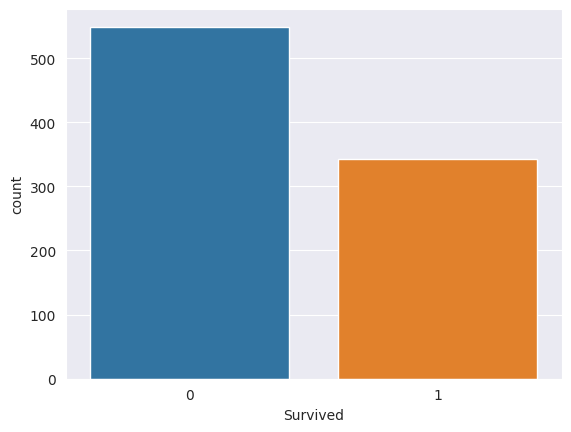

In [43]:
# To check the survived count in train dataset
sns.countplot(data = df_train, x = 'Survived')

* From the countplot above we can tell majority of people didnt survive
* ***Lets see how the countplot varies with respect to various other columns one at a time***

<Axes: xlabel='Survived', ylabel='count'>

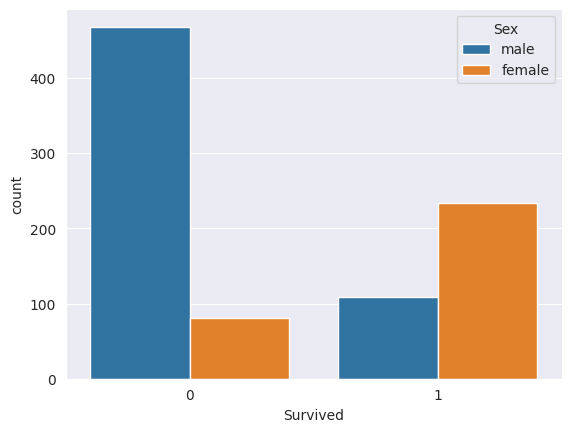

In [44]:
# To check the number of survived when classified according to sex
sns.countplot(data= df_train, x = 'Survived', hue = 'Sex')

From the above countplot we can determine :
* Females are more likely to survive
* Males are more likely to die

<Axes: xlabel='Survived', ylabel='count'>

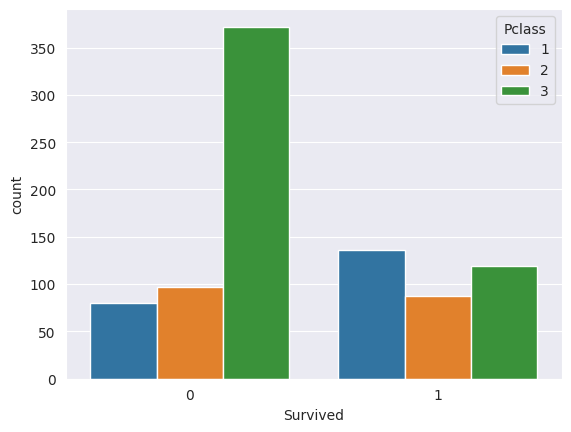

In [45]:
# To check the number of survived when classified according to Pclass
sns.countplot(data= df_train, x = 'Survived', hue = 'Pclass')

Observations:
* People with Pclass - 1 is more likely to survive
* Pclass - 3 are more likely to die 
* Pclass - 2 are more likely to survive than Pclass - 3 but less than Pclass - 1

<Axes: xlabel='Survived', ylabel='count'>

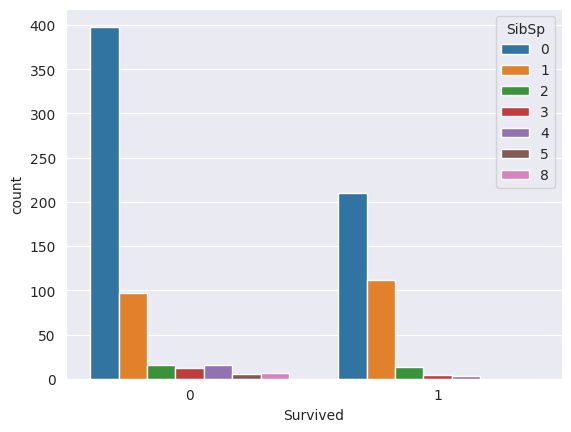

In [46]:
# To check the number of survived when classified according to SibSp
sns.countplot(data= df_train, x = 'Survived', hue = 'SibSp')

* People with 1 or 2 Sibling/Spouse are more likely to survive than the rest

<Axes: xlabel='Survived', ylabel='count'>

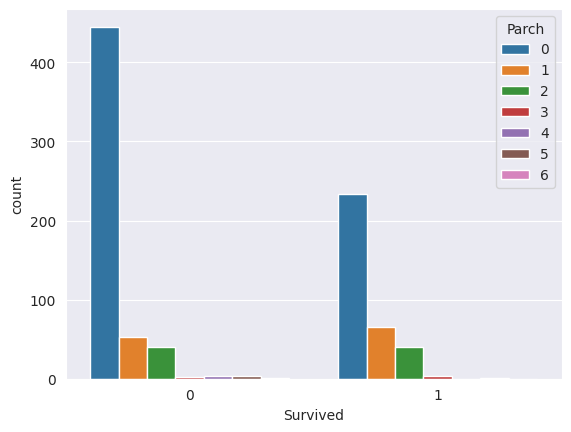

In [47]:
# To check the number of survived when classified according to Parch
sns.countplot(data= df_train, x = 'Survived', hue = 'Parch')

* Again similar to SibSp, people with 1 or 2 Parent/Child are more likely to survive than the rest

<Axes: xlabel='Survived', ylabel='count'>

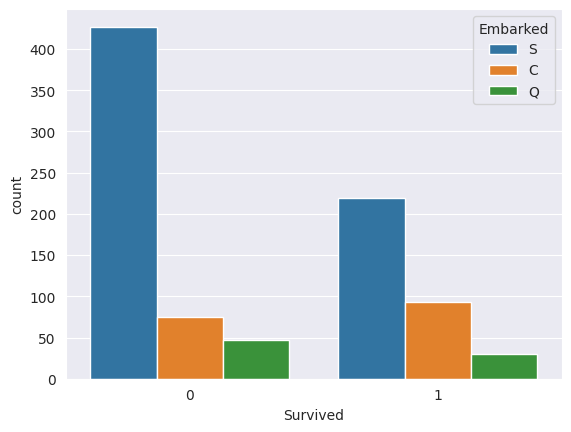

In [48]:
# To check the number of survived when classified according to Embarked
sns.countplot(data= df_train, x = 'Survived', hue = 'Embarked')

* People from Cherbourg(C) are more likely to survive than the rest

# Data Preprocessing

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [50]:
# To check the number of unique values in each column in train dataset
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

* **We can observe from above that 'Sex' and 'Embarked' columns are categoricel with low cardinality, therefore we can easily encode them using OrdinalEncoder.**

In [51]:
encode_cols = ['Sex', 'Embarked']

In [52]:
# To encode 'Sex' and 'Embarked' columns using Ordinal Encoder
odEncoder = OrdinalEncoder()
df_train[encode_cols] = odEncoder.fit_transform(df_train[encode_cols])
df_test[encode_cols] = odEncoder.transform(df_test[encode_cols])

* Remaining categorical columns 'Name' and 'Ticket' have very high cardinality and doesnt help us much, therfore we will drop them.
* Also, we will drop 'PessengerId' column because it is not of much use either.

In [53]:
# To drop the following columns in train and test datasets
for data in [df_train, df_test]:
    data.drop(columns = ['PassengerId', 'Name', 'Ticket'], inplace = True)

In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [55]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    float64
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 23.0 KB


In [56]:
df_train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.047255,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.408487,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.078421,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.047255,-0.408487,0.078421,1.000000,-0.243526,-0.171095,0.123784,-0.011245
SibSp,-0.035322,0.083081,-0.114631,-0.243526,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.171095,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.123784,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.011245,0.068230,0.039798,-0.224719,1.000000


<Axes: >

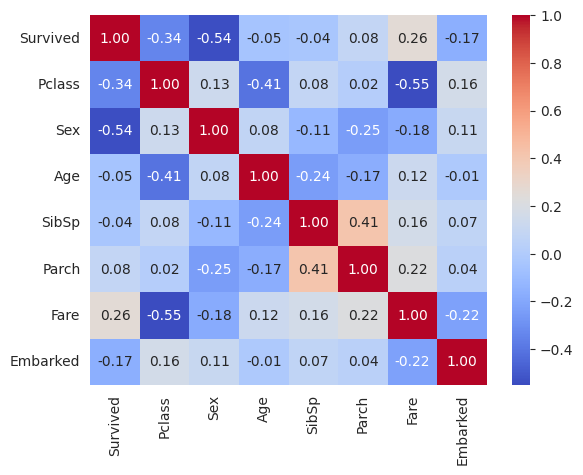

In [57]:
sns.heatmap(df_train.corr(), annot = True, fmt = '.2f' ,cmap = 'coolwarm')

# Model Training

In [58]:
# Creating training and target data
X = df_train.drop(columns = 'Survived')
y = df_train['Survived']

In [59]:
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Training a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
# Make predictions on the validation set
valid_predictions = model.predict(X_valid)

In [62]:
# Calculate accuracy
accuracy = accuracy_score(y_valid, valid_predictions)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.8156424581005587


In [63]:
# Make predictions on the test set
test_predictions = model.predict(df_test)

In [64]:
test_data = pd.read_csv(test_path)
test_data['PassengerId'] = test_data['PassengerId'].astype('Int32')

In [65]:
# Prepare submission file
submission = pd.DataFrame({"PassengerId": test_data["PassengerId"], "Survived": test_predictions})

In [66]:
# Save submission to CSV
submission.to_csv("submission.csv", index=False)

# Results:
* **According to kaggle the model had a score of 0.76076**

# Conclusion and Findings :
* *Females are more likely to survive than males*
* *People belonging to Pessenger class 1 are more likely to survive*
* *Peopole with 1 or 2 silbling / spouse are more likely to survive*
* *Peopole with 1 or 2 Parent/Children are more likely to survive*
